<a href="https://colab.research.google.com/github/BenChiesa/ECGR_4105/blob/Assignment_1/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/BenChiesa/ECGR_4105/main/D3.csv')
X = df.iloc[:, :3]
y = df.iloc[:, 3]

Problem 1

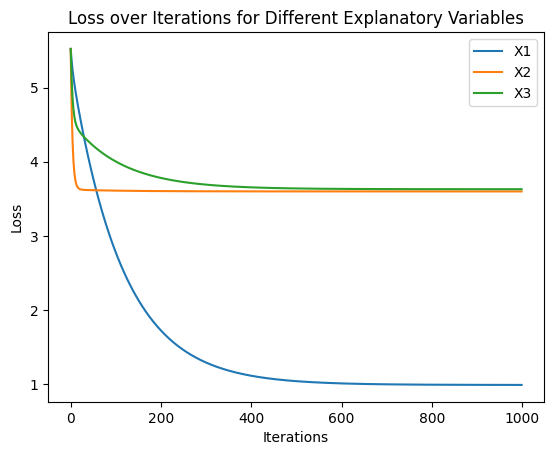

Feature: X1, Theta: -2.0116, Bias: 5.8592, Final Loss: 0.9856
Feature: X2, Theta: 0.5597, Bias: 0.7308, Final Loss: 3.5994
Feature: X3, Theta: -0.5089, Bias: 2.8421, Final Loss: 3.6296


In [5]:
def gradient_descent(X, y, learning_rate=0.05, iterations=1000):
    m = len(y)
    theta = 0
    bias = 0
    losses = []

    for _ in range(iterations):
        y_pred = theta * X + bias
        error = y_pred - y

        d_theta = (1/m) * np.dot(error, X)
        d_bias = (1/m) * np.sum(error)

        theta -= learning_rate * d_theta
        bias -= learning_rate * d_bias

        loss = (1/(2*m)) * np.sum(error**2)
        losses.append(loss)

    return theta, bias, losses

learning_rate = 0.02
iterations = 1000
models = {}

for i, feature in enumerate(X.columns):
    theta, bias, losses = gradient_descent(X[feature], y, learning_rate, iterations)
    models[feature] = {"theta": theta, "bias": bias, "losses": losses}

    plt.plot(range(iterations), losses, label=f'{feature}')

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss over Iterations for Different Explanatory Variables")
plt.legend()
plt.show()

for feature, model in models.items():
    print(f"Feature: {feature}, Theta: {model['theta']:.4f}, Bias: {model['bias']:.4f}, Final Loss: {model['losses'][-1]:.4f}")

Problem 2

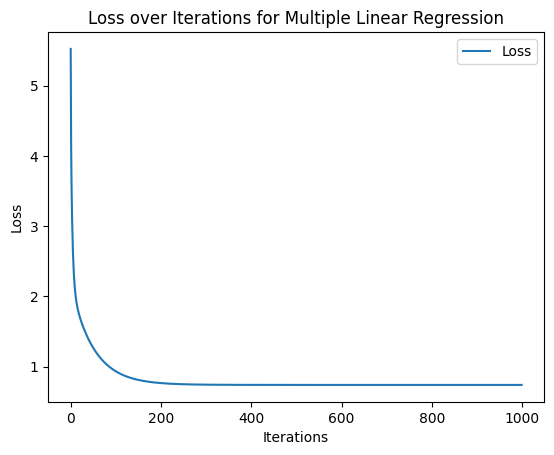

Final Model: Theta: [-2.00368658  0.53260157 -0.26556795], Bias: 5.313935769531635, Final Loss: 0.7385
Predictions for new values:
Input [1 1 1]: Predicted y = 3.5773
Input [2 0 4]: Predicted y = 0.2443
Input [3 2 1]: Predicted y = 0.1025


In [9]:
def gradient_descent_multi(X, y, learning_rate=0.05, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    bias = 0
    losses = []

    for _ in range(iterations):
        y_pred = np.dot(X, theta) + bias
        error = y_pred - y

        d_theta = (1/m) * np.dot(X.T, error)
        d_bias = (1/m) * np.sum(error)

        theta -= learning_rate * d_theta
        bias -= learning_rate * d_bias

        loss = (1/(2*m)) * np.sum(error**2)
        losses.append(loss)

    return theta, bias, losses

learning_rate = 0.1
iterations = 1000
theta, bias, losses = gradient_descent_multi(X, y, learning_rate, iterations)

plt.plot(range(iterations), losses, label='Loss')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss over Iterations for Multiple Linear Regression")
plt.legend()
plt.show()

print(f"Final Model: Theta: {theta}, Bias: {bias}, Final Loss: {losses[-1]:.4f}")

new_X = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
predictions = np.dot(new_X, theta) + bias
print("Predictions for new values:")
for i, val in enumerate(new_X):
    print(f"Input {val}: Predicted y = {predictions[i]:.4f}")